In [2]:
import osmnx as ox
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] 
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
file_path3 = "/Users/creative/Documents/python/Weather data collection/Data/temp_data.xlsx"
temp = pd.read_excel(file_path3)

In [5]:
temp.head(1)

,日期,最高温度,最低温度,城市,lng,lat,group,date,year
0,2020年01月01日,20,15,深圳,114.109,22.544,内地,1,1


In [6]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [7]:
current_year = "2020年01月01日"
dff = temp[temp['日期'].eq(current_year)].sort_values(by='最高温度', ascending=True)

In [8]:
dff

,日期,最高温度,最低温度,城市,lng,lat,group,date,year
93,2020年01月01日,19,16,香港,114.177,22.307,港澳台,1,1
124,2020年01月01日,19,17,澳门,113.544,22.202,港澳台,1,1
186,2020年01月01日,19,12,惠州,114.398,23.096,内地,1,1
0,2020年01月01日,20,15,深圳,114.109,22.544,内地,1,1
62,2020年01月01日,20,16,珠海,113.565,22.248,内地,1,1
217,2020年01月01日,20,15,东莞,113.736,23.047,内地,1,1
155,2020年01月01日,21,14,佛山,113.167,22.828,内地,1,1
31,2020年01月01日,22,13,广州,113.265,23.108,内地,1,1
248,2020年01月01日,22,18,江门,113.060,22.610,内地,1,1
279,2020年01月01日,22,16,中山,113.359,22.528,内地,1,1


In [9]:
colors = dict(zip(['内地','港澳台'],['#eceae8', '#c0d0e1']))
group_lk = temp.set_index('城市')['group'].to_dict()

Text(1, 1, '2020年01月01日')

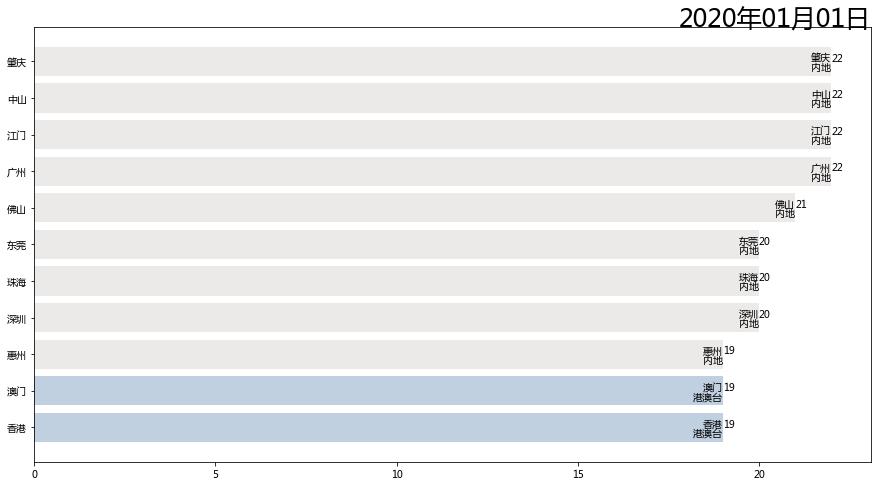

In [16]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['城市'], dff['最高温度'], color=[colors[group_lk[x]] for x in dff['城市']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['最高温度'], dff['城市'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 1, current_year, transform=ax.transAxes, size=25, ha='right')

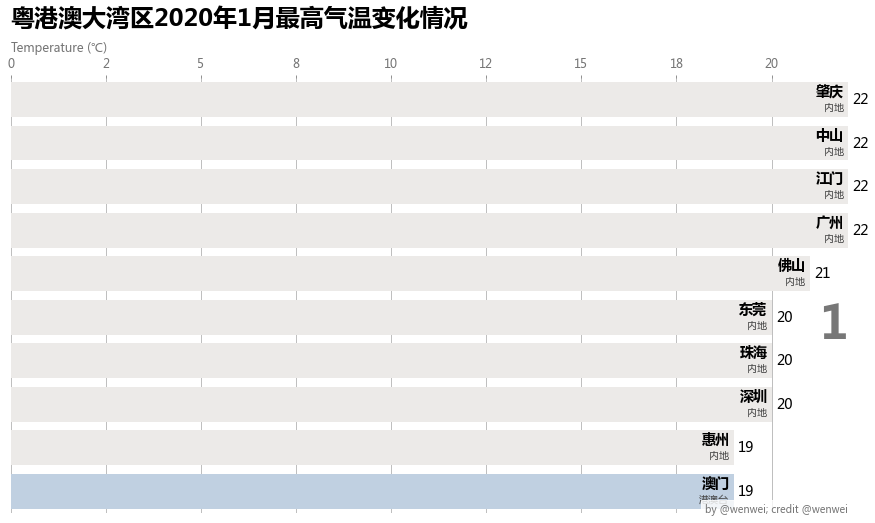

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))

def draw_barchart(year):
    dff = temp[temp['year'].eq(year)].sort_values(by='最高温度', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff['城市'], dff['最高温度'], color=[colors[group_lk[x]] for x in dff['城市']])
    dx = dff['最高温度'].max() / 200
    for i, (value, name) in enumerate(zip(dff['最高温度'], dff['城市'])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Temperature (℃)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, '粤港澳大湾区2020年1月最高气温变化情况',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @wenwei; credit @wenwei', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(1)

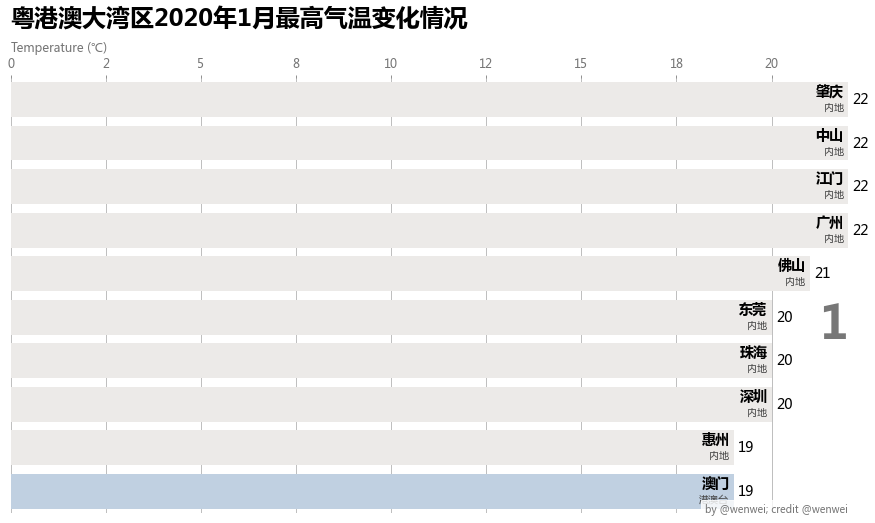

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))

animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1,31))
HTML(animator.to_jshtml()) 
#animator.to_html5_video()
#animator.save("temp.gif") 